# Intro til Geopandas

In [1]:
import pandas as pd
import geopandas as gpd

Geopandas er et Python-bibliotek som integrerer Pandas med GIS-analysering og kartlegging.

Geopandas er bygd opp rundt GeoDataFrames. som er en pandas DataFrame med geografisk informasjon. Disse kan lastes inn direkte hvis man har geografiske filer, eller hvis man har en tabell med koordinat-kolonner kan de konverteres til geodataframes.

Hvis du har en tabell med koordinat-kolonner kan du bruke GeoPandas til å kartlegge dataene og lage nye variabler ved å gjøre geografiske koblinger til vegdata, bygningsdata, arealtyper, tettsteder og så videre. 

I denne notebooken demonstrerer vi en enkel avstandsanal
hvordan en Excel-fil kan gjøres til en GeoDataFrame 

og til å beregne avstand beregner avstand og kobler dataene våre med andre geodata. Dette er ting som kan gjøres med 
kan gjøres geografisk og hvordan man kan beregne avstander og gjøre geografiske koblinger med andre geodata. 



Vi starter med å laste inn en Excel-fil med koordinat-kolonner. Denne viser alle dyr som er registrert døde i Norge i jaktsesongen 2020-2021.

In [2]:
data = pd.read_excel("X:/426/Primar/JAKT/Avgang av rovdyr og hjortevilt (4386)/Fallvilt/Koordinater fra HVreg/koordinater_2020_2021.xlsx")
data = data[~data.Nord.isna()] #fjern rader uten koordinater
data.head(3)

,Kommunenummer,Kommunenavn,Dato,Tid,Art,FallviltID,Årsak,Utfall,Nord,Øst,Koordinatfesting,Stedsnavn,Alder,Kjønn
0,301,Oslo,01.05 2020,10:00,Rådyr,1212252,Sykdom og skade,Avlivet på stedet,6653090.0,265959.0,UTM 33,Årvoll-området,Voksent dyr,Hunn
1,301,Oslo,01.07 2020,13:13,Rådyr,1191202,Sykdom og skade,Avlivet på stedet,6653455.0,262697.0,UTM 33,tåsenveien,Voksent dyr,Hann
2,301,Oslo,01.10 2020,11:34,Rådyr,1196537,Sykdom og skade,Dødt på stedet,6655193.0,257029.0,UTM 33,Ankerveien 100,Kalv/årsunge,Hann


Legg merke til kolonnene 'Nord' og 'Øst'. Disse inneholder koordinater i UTM 33-format, som er standarden når man jobber med geodata i Norge. 

For å konvertere denne DataFramen til en GeoDataFrame, kan vi gjøre følgende:

In [3]:
punkter = gpd.GeoDataFrame(data,
                           geometry = gpd.points_from_xy(data.Øst, data.Nord), # kolonnene som utgjør geometrien
                           crs = 25833) # 25833 er nummeret for UTM 33N-koordinatsystemet
punkter.head(3)

,Kommunenummer,Kommunenavn,Dato,Tid,Art,FallviltID,Årsak,Utfall,Nord,Øst,Koordinatfesting,Stedsnavn,Alder,Kjønn,geometry
0,301,Oslo,01.05 2020,10:00,Rådyr,1212252,Sykdom og skade,Avlivet på stedet,6653090.0,265959.0,UTM 33,Årvoll-området,Voksent dyr,Hunn,POINT (265959.000 6653090.000)
1,301,Oslo,01.07 2020,13:13,Rådyr,1191202,Sykdom og skade,Avlivet på stedet,6653455.0,262697.0,UTM 33,tåsenveien,Voksent dyr,Hann,POINT (262697.000 6653455.000)
2,301,Oslo,01.10 2020,11:34,Rådyr,1196537,Sykdom og skade,Dødt på stedet,6655193.0,257029.0,UTM 33,Ankerveien 100,Kalv/årsunge,Hann,POINT (257029.000 6655193.000)


Tabellen vi får minner veldig om vår opprinnelige dataframe. Forskjellen er at det har dukket opp en ny geometri-kolonne (en GeoSeries) helt til høyre. 

Her indikeres geometritypen, i dette tilfellet er hver rad ett punkt, og hvor geometrien befinner seg geografisk i form av X- og Y-koordinater. 

Dette gjør at man kan kartlegge dataene med geopandas.plot().

<AxesSubplot:>

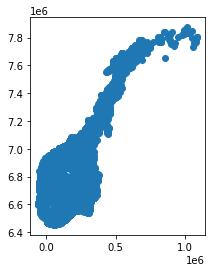

In [4]:
punkter.plot()

De ikke-geografiske kolonnene i en GeoDataFrame kan manipuleres på samme måte som en pandas DataFrame:

In [5]:
punkter = punkter.query('Art=="Elg" | Art=="Hjort" | Art=="Rådyr"')

## Kartlegging 

geopandas.plot() er knyttet til matplotlib, som gir stor valgfrihet når det kommer til kartlegging. Her er et enkelt kart som viser tydelig hvor i landet det dør og skades mest hjort, elg og rådyr.

<AxesSubplot:title={'center':'Fallvilt i Norge'}>

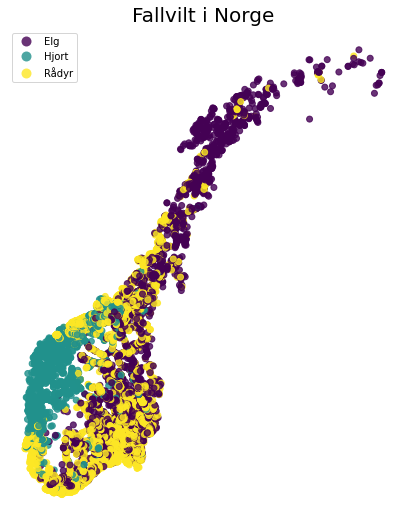

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.set_title("Fallvilt i Norge", fontsize = 20)
ax.set_facecolor('#f5f5f5')
ax.set_axis_off()
punkter.plot(column="Art", cmap="viridis", ax=ax, alpha=0.8, legend=True)

## Buffer og geometri-typer

En buffer er området rundt (eller inni) våre geografiske data. For et punkt, vil dette være en sirkel. 

Sånn ser buffere rundt et punkt ut med radier mellom 100 og 500 meter.

OBS: Hvis man ikke har UTM-koordinater, men lengde-/breddegrader (f.eks 71.02034, 26.30545), vil buffer(1000) bety at man bufrer med en radius på 1000 lengde-/breddegrader. Det vil man aldri gjøre. 

,geometry,verdi
0,"POLYGON ((266459.000 6653090.000, 266456.592 6...",500
1,"POLYGON ((266359.000 6653090.000, 266357.074 6...",400
2,"POLYGON ((266259.000 6653090.000, 266257.555 6...",300
3,"POLYGON ((266159.000 6653090.000, 266158.037 6...",200
4,"POLYGON ((266059.000 6653090.000, 266058.518 6...",100


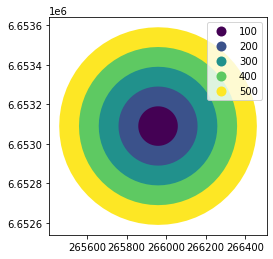

In [7]:
# buffere i ulike størrelser for det første punktet i geodataframen
buff100 = punkter.buffer(100).iloc[0]
buff200 = punkter.buffer(200).iloc[0]
buff300 = punkter.buffer(300).iloc[0]
buff400 = punkter.buffer(400).iloc[0]
buff500 = punkter.buffer(500).iloc[0]

# samle det
gdf = gpd.GeoDataFrame({'geometry': gpd.GeoSeries([buff500, buff400, buff300, buff200, buff100]), 'verdi':["500", "400", "300", "200", "100"]}, geometry='geometry')

# og kartlegg
gdf.plot(column="verdi",cmap="viridis", legend=True)

gdf

Som vi ser i tabellen, består geometri-kolonnen vår ikke lenger av punkter, men polygoner. Et polygon er en mangesidet flate med minst tre hjørner. I dette tilfellet har vi sirkler med veldig mange hjørner. 

Et polygon skiller seg fra den tredje geometritypen, linjer, ved at polygoner er lukket og inneholder arealet innenfor grensene. 

Sånn her kan man finne buffernes areal i kvadratmeter og kvadratkilometer:

In [8]:
gdf["areal_m2"] = gdf.area
gdf["areal_km2"] = gdf.area / 1000000
print("areal i kvadratkilometer:")
gdf["areal_km2"]

areal i kvadratkilometer:


0    0.784137
1    0.501848
2    0.282289
3    0.125462
4    0.031365
Name: areal_km2, dtype: float64

Når man bufrer en GeoDataFrame, som vi gjorde ovenfor, returneres kun geometri-kolonnen som en GeoSeries. 

Hvis man vil beholde de andre kolonnene i geodataframen sin, må man skrive at det kun er geometry-kolonnen man vil endre. Sånn her:

,Kommunenummer,Kommunenavn,Dato,Tid,Art,FallviltID,Årsak,Utfall,Nord,Øst,Koordinatfesting,Stedsnavn,Alder,Kjønn,geometry
0,301,Oslo,01.05 2020,10:00,Rådyr,1212252,Sykdom og skade,Avlivet på stedet,6653090.0,265959.0,UTM 33,Årvoll-området,Voksent dyr,Hunn,"POLYGON ((266959.000 6653090.000, 266954.185 6..."
1,301,Oslo,01.07 2020,13:13,Rådyr,1191202,Sykdom og skade,Avlivet på stedet,6653455.0,262697.0,UTM 33,tåsenveien,Voksent dyr,Hann,"POLYGON ((263697.000 6653455.000, 263692.185 6..."
2,301,Oslo,01.10 2020,11:34,Rådyr,1196537,Sykdom og skade,Dødt på stedet,6655193.0,257029.0,UTM 33,Ankerveien 100,Kalv/årsunge,Hann,"POLYGON ((258029.000 6655193.000, 258024.185 6..."


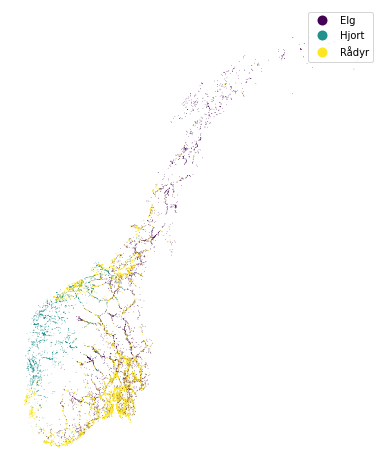

In [9]:
#lager først en kopi for å gi geodataframen et mer passende navn
bufret = punkter.copy(deep=True)
bufret["geometry"] = bufret.buffer(1000)

#kartlegg
fig, ax = plt.subplots(1, figsize=(11, 8.5))
ax.set_facecolor('#f5f5f5')
ax.set_axis_off()
bufret.plot(column="Art", cmap="viridis", ax=ax, legend=True)
bufret.head(3)

Sirklene i kartet har nå blitt mye mindre enn tidligere. Det er fordi punkter gjerne er store i kart for at de skal være synlige. 

Nå som vi har bufret med 1 km, vises polygonene i sin reelle størrelse i kartets målestokk.

Bufring er et viktig GIS-verktøy. Her kan det for eksempel brukes til å finne ut hvilke punkter som ligger innenfor en viss avstand, her 1000 meter, til bilveger. Dette kan vi finne ut med en romlig kobling. 

## Romlig kobling

En romlig kobling (spatial join) fungerer som en tabellkobling (pandas.merge), bare at man kobler basert på geografisk plassering heller enn en kolonne.

Vi kunne for eksempel koblet punktene våre til arealbruksdata for å finne ut om de er plassert i skogen, på jorder i slalombakker og så videre. 

Eller til tettsteder, for å finne ut om punktene er innenfor eller utenfor tettbygde strøk.

Eller hvis vi vil vite hvilke punkter som ligger innenfor 1000 meter fra bilveger, kan vi gjøre en romlig kobling mellom de bufrede punktene våre og vegdata. 

Dette kan gjøres med geopandas.sjoin().

Når vi vil vite hvilke punkter som er innenfor 1000 meter fra en bilveg, plasserer vi de bufrede punktene før 'sjoin' og vegdata inni parentesen. Sånn her: 

bufret.sjoin(veger)

Hvis vi skulle være interessert i det motsatte, altså hvilke veger som ligger innenfor 1000 meter fra der et dødt dyr ble registrert, kan vi bytte om rekkefølgen til:

veger.sjoin(bufret)

Vi starter med å hente inn vegdata. Dette er en filtype som allerede inneholder geometri. Den kan leses med geopandas.read_file.

In [15]:
# les vegdata
veger = gpd.read_file("X:/426/AREAL/Prosjekter/1729_TERM/aar_2022/Resultat/Fallvilt/NVDB_ryddet_ERFK_2022.gpkg")
veger = veger[["ROUTE_ID", "ROADTYPE", "ROADNUMBER", "CATEGORY", "KOMMUNENR", "geometry"]]
veger.head(3)

,ROUTE_ID,ROADTYPE,ROADNUMBER,CATEGORY,KOMMUNENR,geometry
0,41980,Enkel bilveg,4128.0,K,5001,"LINESTRING Z (267625.590 7037156.740 114.459, ..."
1,41980,Enkel bilveg,4128.0,K,5001,"LINESTRING Z (267591.490 7037139.190 115.696, ..."
2,41980,Enkel bilveg,4123.0,K,5001,"LINESTRING Z (267588.710 7037138.100 115.829, ..."


Her ser vi at geometri-kolonnen inneholder geometri-typen "MULTILINESTRING Z". Det betyr at hver rad består av en samling av linjer ("linestring") som inneholder Z-koordinater for høyde i tillegg til X og Y for lengde- og breddegrad. 

Nå kan vi koble de bufrede punktene med vegene. 

In [11]:
innenfor_1km = gpd.sjoin(bufret, veger, how = "inner")

print("Antall rader før kobling: " + str(len(bufret)))
print("Antall rader etter kobling: " + str(len(innenfor_1km)))

innenfor_1km.head(3)

Antall rader før kobling: 20288
Antall rader etter kobling: 2205402


,Kommunenummer,Kommunenavn,Dato,Tid,Art,FallviltID,Årsak,Utfall,Nord,Øst,...,SUPERLANES,LANES,ROADTYPE,ROADNUMBER,CATEGORY,COUNTYNUMBER,DETAIL_LEVEL_CODES,SHAPE_Length,KOMMUNENR,FYLKE
0,301,Oslo,01.05 2020,10:00,Rådyr,1212252,Sykdom og skade,Avlivet på stedet,6653090.0,265959.0,...,None,1#2,Enkel bilveg,12007.0,K,3.0,1,24.897834,0301,03
25,301,Oslo,05.02 2021,21:32,Rådyr,1207950,Sykdom og skade,Avlivet på stedet,6653094.0,266036.0,...,None,1#2,Enkel bilveg,12007.0,K,3.0,1,24.897834,0301,03
26,301,Oslo,05.04 2020,14:30,Rådyr,1186000,Sykdom og skade,Avlivet på stedet,6653292.0,264708.0,...,None,1#2,Enkel bilveg,12007.0,K,3.0,1,24.897834,0301,03


Bufferdataene våre har nå fått nye kolonner, med verdiene fra vegsegmentet som overlapper med bufferen. 

Som vi ser, har vi fått over 100 ganger så mange rader etter koblingen. Det er fordi den romlige koblingen gir oss én rad (buffer) per overlappende vegsegment. 

Dette kunne vi for eksempel brukt til å sjekke hvor mange vegsegmenter som er innenfor hver buffer:

<AxesSubplot:title={'center':'Antall overlappende veger for hver buffer'}>

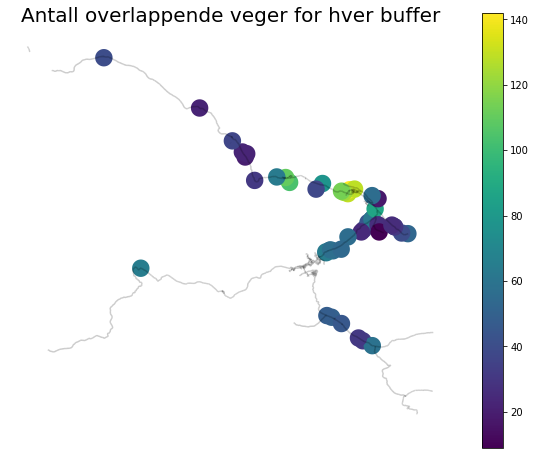

In [12]:
#tell opp antall av hver ID
innenfor_1km['antall_overlappende_veger'] = innenfor_1km['FallviltID'].map(innenfor_1km['FallviltID'].value_counts()).fillna(0).astype(int)

# kartlegger Hol kommune
veger_hol = veger[veger.KOMMUNENR == "3044"]
innenfor_1km_hol = innenfor_1km[innenfor_1km.Kommunenummer == 3044] #kommunenumrene er her integer
innenfor_1km_hol = innenfor_1km_hol.drop_duplicates("FallviltID")
fig, ax = plt.subplots(1, figsize=(10, 8))
ax.set_facecolor('#f5f5f5')
ax.set_axis_off()
ax.set_title("Antall overlappende veger for hver buffer",size=20)
innenfor_1km_hol.plot(column="antall_overlappende_veger", cmap="viridis", ax=ax, legend=True)
veger_hol.plot(color="black",alpha=0.2,ax=ax)

Men her vil jeg finne ut hvor mange av de opprinnelige punktene som ligger innenfor 1000 meter fra en bilveg. 

Jeg fjerner derfor rader med lik ID og lager en geodataframe med bufferne som ikke ble koblet med veg.

In [21]:
innenfor_1km = innenfor_1km.drop_duplicates("FallviltID")
print(f"Antall etter at duplikater er fjernet:{len(innenfor_1km)}")

ikke_innenfor_1km = bufret[~bufret.FallviltID.isin(list(innenfor_1km.FallviltID.unique()))]
print(f"Antall mer enn 1 km fra veg: {len(ikke_innenfor_1km)}")

print(f"Prosent innen 1 km fra veg: {round(len(innenfor_1km) / (len(innenfor_1km)+len(ikke_innenfor_1km))*100,1)}")

Antall etter at duplikater er fjernet:19508
Antall mer enn 1 km fra veg: 780
Prosent innen 1 km fra veg: 96.2


De aller fleste rapporterte viltdødsfall er altså under én kilometer fra en bilveg.

Sånn ser det ut i kart:

<AxesSubplot:title={'center':'Er fallvilttilfellene registrert innenfor 1 km fra bilveg?'}>

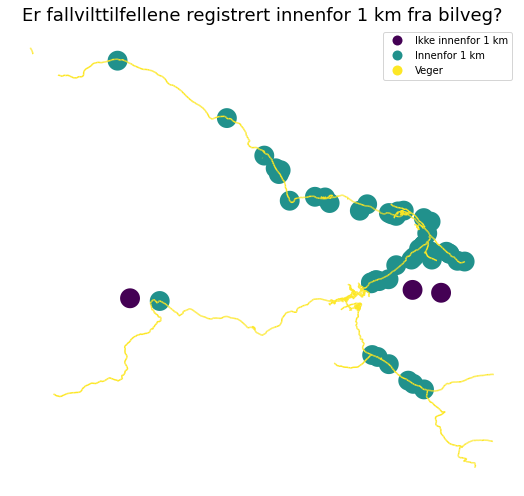

In [22]:
ikke_innenfor_1km_hol = ikke_innenfor_1km[ikke_innenfor_1km.Kommunenummer == 3044].copy(deep=True) #kopierer for å unngå den unødvendige feilmeldingen "A value is trying to be set on a copy of a slice from a DataFrame"
innenfor_1km_hol = innenfor_1km[innenfor_1km.Kommunenummer == 3044].copy(deep=True)
veger_hol = veger[veger.KOMMUNENR == '3044'].copy(deep=True)

ikke_innenfor_1km_hol['verdi'] = "Ikke innenfor 1 km"
innenfor_1km_hol['verdi'] = "Innenfor 1 km"
veger_hol['verdi'] = "Veger"

# Samle dataene. For å samle geodataframes må man legge til 'gpd.GeoDataFrame' utenfor 'pd.concat'
alt_hol = gpd.GeoDataFrame(pd.concat([innenfor_1km_hol, ikke_innenfor_1km_hol, veger_hol], ignore_index=True))

#kartlegg
fig, ax = plt.subplots(1, figsize=(11, 8.5))
ax.set_axis_off()
ax.set_title("Er fallvilttilfellene registrert innenfor 1 km fra bilveg?",size=18)
alt_hol.plot(column="verdi", cmap="viridis", ax=ax, legend=True)

Legg merke til at hele buffersirklene returneres når man gjør en spatial join, selv om bare deler av sirklene overlapper med vegene.

Hvis man vil ha returnert kun det som faktisk overlapper med vegene, kan man gjøre en intersection-overlay. 

Mer om dette og andre overlay-koblinger i neste del, 2_overlay_vernet_areal.